<a target="_blank" href="https://colab.research.google.com/github/sonder-art/fdd_p25/blob/main/professor/numpy/notebooks/tarea_tiempos_numpy.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


### El proyecto se entrega en un pull-request en este documento directamente, que no sea del main branch sino de un branch llamado `proyecto_python`, y el titulo de pull reques `Proyecto Python`, se entrega antes del 6 de noviembre.

# Tarea/Proyecto — Tiempos con distintas estrategias (Python vs NumPy)

Objetivo: practicar varias formas de programar en Python y comparar su rendimiento con NumPy.

Qué harás:
- Implementar 3 problemas (P1 sencillo, P2 intermedio, P3 un poco más complejo).
- Para cada problema, crear 4 versiones: for, list comprehension, generator (yield/generador), y NumPy vectorizado.
- Medir tiempos con `timeit` de forma justa y compararlos.

Reglas mínimas:
- Verifica primero que todas las versiones producen el mismo resultado lógico (mismo tamaño/forma, mismos valores o valores equivalentes).
- Sé consistente: no mezcles listas y arreglos sin aclarar el formato final esperado.
- Para medir generadores, materializa con `list(...)` en el cronómetro para compararlo con las otras estrategias.
- No copies soluciones externas; escribe tu implementación.

Referencia: `07_Vectorizacion_vs_For_vs_Comprehensions.ipynb`.



In [1]:
# Instalación rápida (si la necesitas)

import numpy as np
import timeit


## Problema 1 — Escalar un vector por una constante

Descripción: dado un arreglo 1D `a` y una constante escalar `c`, produce una salida equivalente a `a * c`.

Requisitos:
- Entrada: `a` (1D), `c` (float/int).
- Salida: misma longitud que `a`, valores escalados por `c`.
- Mantén el tipo de salida consistente entre versiones (lista vs ndarray), o documenta la diferencia.

Implementa 4 versiones:
- for loop (acumula resultados con append)
- list comprehension
- generator (yield o expresión generadora)
- NumPy vectorizado

Datos sugeridos: `a = np.arange(n, dtype=float)`, `c = 2.0`.


In [2]:
# P1 — Stubs (completa las funciones)

def p1_for(a: np.ndarray, c: float):
    """Devuelve a*c usando for y append."""
    resultado = []
    for elemento in a:
        resultado.append(elemento * c)
    return resultado


def p1_comp(a: np.ndarray, c: float):
    """Devuelve a*c usando list comprehension."""
    return [elemento * c for elemento in a]


def p1_gen(a: np.ndarray, c: float):
    """Devuelve (como generador) a*c usando yield o gen expr."""
    for elemento in a:
        yield elemento * c


def p1_np(a: np.ndarray, c: float):
    """Devuelve a*c usando NumPy vectorizado."""
    return a * c 

    


In [3]:
# P1 — Harness de tiempos (ajusta n y number)

def time_p1(n=100_000, number=5):
    a = np.arange(n, dtype=float)
    c = 2.0
    return (
        timeit.timeit(lambda: p1_for(a, c), number=number),
        timeit.timeit(lambda: p1_comp(a, c), number=number),
        timeit.timeit(lambda: list(p1_gen(a, c)), number=number),
        timeit.timeit(lambda: p1_np(a, c), number=number),
    )

time_p1()  


(0.2797004139999899,
 0.29540600300003916,
 0.3041272159999835,
 0.0014103449999538498)

## Problema 2 — Suma de vecinos 1D (ventana)

Descripción: dado `a` (1D) y una ventana `k` impar (p. ej. 3), calcular `b[i]` como la suma de los `k` vecinos centrados en `i`.

Requisitos:
- Entrada: `a` (1D), `k` impar ≥ 3.
- Borde: puedes ignorar índices fuera de rango, recortar el resultado o replicar/extender bordes; explica tu elección.
- Salida: 1D; documenta si su longitud cambia por tu manejo de bordes.

Implementa 4 versiones: for, list comprehension, generator, NumPy vectorizado (pistas: slicing con desplazamientos, `np.roll`, o una convolución simple).

Datos sugeridos: `a = np.arange(n, dtype=float)`, `k = 3`. 


In [ ]:
# P2 — Stubs (completa las funciones)

def p2_for(a: np.ndarray, k: int = 3): 
    """Devuelve suma de vecinos (1D) con for. Manejo de bordes a tu elección."""
    n = len(a)
    resultado = []
    radio = k // 2
    for i in range(radio, n - radio):
        suma = 0
        for j in range(i - radio, i + radio + 1):
            suma += a[j]
        resultado.append(suma)
    
    return resultado  


def p2_comp(a: np.ndarray, k: int = 3):
    """List comprehension."""
    n = len(a)
    radio = k // 2
    
    return [
        sum(a[i - radio : i + radio + 1])
        for i in range(radio, n - radio)
    ]  


def p2_gen(a: np.ndarray, k: int = 3):
    """Generator (yield o gen expr)."""
    n = len(a)
    radio = k // 2
    
    for i in range(radio, n - radio):
        suma = sum(a[i - radio : i + radio + 1])
        yield suma
    


def p2_np(a: np.ndarray, k: int = 3):
    """NumPy vectorizado (slicing/roll/convolución simple)."""
    kernel = np.ones(k, dtype=float)
    resultado = np.convolve(a, kernel, mode='valid')
    return resultado 


In [9]:
# P2 — Harness de tiempos

def time_p2(n=100_000, number=3):
    a = np.arange(n, dtype=float)
    k = 3
    return (
        timeit.timeit(lambda: p2_for(a, k), number=number),
        timeit.timeit(lambda: p2_comp(a, k), number=number),
        timeit.timeit(lambda: list(p2_gen(a, k)), number=number),
        timeit.timeit(lambda: p2_np(a, k), number=number),
    )

time_p2()  


(0.961580916999992,
 1.660242432999894,
 1.7774461619999329,
 0.001616777999970509)

## Problema 3 — Transformación no lineal y filtrado

Descripción: dado `a` (1D float), aplica una transformación no lineal y filtra con un umbral.

Requisitos:
- Transformación propuesta (de ejemplo): `np.sin(a) + a**2`.
- Entrada: `a` (1D float), `umbral` (float).
- Salida: colección con los elementos resultantes que superan `umbral`.
- Mantén clara la diferencia entre devolver lista vs ndarray.

Implementa 4 versiones: for, list comprehension, generator, NumPy vectorizado (ufuncs + máscara booleana).

Datos sugeridos: `a = np.linspace(0, 1000, n)`, `umbral = 10.0`. 


In [14]:
# P3 — Stubs (completa las funciones)

def p3_for(a: np.ndarray, umbral: float):
    """Filtra tras transformación no lineal con for."""
    resultado = []
    for elemento in a:
        transformado = np.sin(elemento) + elemento ** 2
        if transformado > umbral:
            resultado.append(transformado)
    return resultado


def p3_comp(a: np.ndarray, umbral: float):
    """List comprehension."""
    return [np.sin(elemento) + elemento ** 2 for elemento in a if np.sin(elemento) + elemento ** 2 > umbral]



def p3_gen(a: np.ndarray, umbral: float):
    """Generator (yield o gen expr)."""
    for elemento in a:
        transformado = np.sin(elemento) + elemento ** 2
        if transformado > umbral:
            yield transformado


def p3_np(a: np.ndarray, umbral: float):
    """NumPy vectorizado (ufuncs + máscara booleana)."""
    transformado = np.sin(a) + a ** 2
    mascara = transformado > umbral
    resultado = transformado[mascara]
    return resultado

In [15]:
# P3 — Harness de tiempos

def time_p3(n=200_000, number=3):
    a = np.linspace(0, 1000, n, dtype=float)
    umbral = 10.0
    return (
        timeit.timeit(lambda: p3_for(a, umbral), number=number),
        timeit.timeit(lambda: p3_comp(a, umbral), number=number),
        timeit.timeit(lambda: list(p3_gen(a, umbral)), number=number),
        timeit.timeit(lambda: p3_np(a, umbral), number=number),
    )
time_p3()  


(3.1937849259998075,
 5.899711259000014,
 2.5352637679998224,
 0.05660061299977315)

## Guardar resultados de tiempos en JSON (guía)

Motivación: conservar resultados de experimentos para compararlos más tarde (en otra sesión/equipo), graficarlos o compartirlos. JSON es legible, portable y fácil de procesar.

### Esquema sugerido de datos

- Nivel 1: metadatos del experimento (fecha/hora, versión de Python/NumPy, host, parámetros globales como `n` y `number`).
- Nivel 2: problemas y variantes (p1/p2/p3 y estrategias: for/comp/gen/numpy) con sus tiempos agregados.
- Recomendación: guardar mediana y desviación o percentiles; también puedes guardar el vector de repeticiones si lo necesitas.

```json
{
  "metadata": {
    "timestamp": "2025-10-23T12:34:56Z",
    "python_version": "3.10.12",
    "numpy_version": "2.1.1",
    "machine": "x86_64",
    "params": { "n": 100000, "number": 5 }
  },
  "results": {
    "p1": {
      "for":    { "s_per_call_median": 0.0281, "repetitions": 5 },
      "comp":   { "s_per_call_median": 0.0250, "repetitions": 5 },
      "gen":    { "s_per_call_median": 0.0312, "repetitions": 5 },
      "numpy":  { "s_per_call_median": 0.0004, "repetitions": 5 }
    },
    "p2": { "for": { "s_per_call_median": 0.041 } },
    "p3": { "numpy": { "s_per_call_median": 0.003 } }
  }
}
```

Notas:
- Usa claves en minúsculas y sin espacios para facilitar procesamiento.
- Si guardas vectores de tiempos por repetición, usa una clave adicional (por ejemplo `raw_times: [ ... ]`).
- Si diferencias por tamaño `n`, crea múltiples entradas o anida por `n` (p. ej. `results_by_n: {"1e4": {...}, "1e5": {...}}`).

### Organización de archivos

- Carpeta: `results/tiempos/` dentro del mismo directorio del notebook.
- Nombre de archivo: incluir fecha, problema o tamaño (p. ej., `tiempos_p123_n1e5_2025-10-23.json`).
- Evita sobreescribir: si vuelves a correr, genera un nuevo archivo con timestamp.

### Buenas prácticas al medir y guardar

- Medir varias repeticiones por variante; guardar la mediana (y opcionalmente percentiles como p10/p90) para robustez.
- Registrar parámetros que afectan el resultado: `n`, `number`, dtype, política de bordes en P2, etc.
- Guardar seeds o condiciones de entorno si hay aleatoriedad.
- Validar que los resultados lógicos son equivalentes antes de medir (mismo output).
- No mezclar E/S dentro de la sección medida; la E/S sesga los tiempos.

### Uso posterior

- Leer los JSON y comparar versiones/estrategias; graficar con `matplotlib`/`seaborn`.
- Automatizar reportes que lean todos los archivos de `results/tiempos/` y generen tablas comparativas.
- Mantener un historial temporal para ver regresiones o mejoras de rendimiento.



In [30]:
import json
import os
from datetime import datetime
import platform

def guardar_resultados_simple(n=100_000, number=5):
    carpeta = 'results/tiempos'
    os.makedirs(carpeta, exist_ok=True)
    
    print("Midiendo todos los problemas...")
    tiempos_p1 = time_p1(n=n, number=number)
    tiempos_p2 = time_p2(n=n, number=number)
    tiempos_p3 = time_p3(n=n, number=number)
    
    datos_json = {
        'metadata': {
            'timestamp': datetime.now().isoformat(),
            'python_version': platform.python_version(),
            'numpy_version': np.__version__,
            'machine': platform.machine(),
            'params': {
                'n': n,
                'number': number
            }
        },
        'results': {
            'p1': {
                'for': {'s_per_call_median': tiempos_p1[0] / number, 'repetitions': number},
                'comp': {'s_per_call_median': tiempos_p1[1] / number, 'repetitions': number},
                'gen': {'s_per_call_median': tiempos_p1[2] / number, 'repetitions': number},
                'numpy': {'s_per_call_median': tiempos_p1[3] / number, 'repetitions': number}
            },
            'p2': {
                'for': {'s_per_call_median': tiempos_p2[0] / number, 'repetitions': number},
                'comp': {'s_per_call_median': tiempos_p2[1] / number, 'repetitions': number},
                'gen': {'s_per_call_median': tiempos_p2[2] / number, 'repetitions': number},
                'numpy': {'s_per_call_median': tiempos_p2[3] / number, 'repetitions': number}
            },
            'p3': {
                'for': {'s_per_call_median': tiempos_p3[0] / number, 'repetitions': number},
                'comp': {'s_per_call_median': tiempos_p3[1] / number, 'repetitions': number},
                'gen': {'s_per_call_median': tiempos_p3[2] / number, 'repetitions': number},
                'numpy': {'s_per_call_median': tiempos_p3[3] / number, 'repetitions': number}
            }
        }
    }
    
    nombre_archivo = 'tiempos_p123.json'
    ruta_completa = os.path.join(carpeta, nombre_archivo)
    
    with open(ruta_completa, 'w', encoding='utf-8') as f:
        json.dump(datos_json, f, indent=2, ensure_ascii=False)
    
    print(f"✅ Resultados guardados en: {ruta_completa}")
    return ruta_completa

In [31]:
guardar_resultados_simple(n=100_000, number=5)

Midiendo todos los problemas...
✅ Resultados guardados en: results/tiempos/tiempos_p123.json


'results/tiempos/tiempos_p123.json'

In [32]:
import json

with open('results/tiempos/tiempos_p123.json', 'r') as f:
    datos = json.load(f)

print("=" * 70)
print("METADATOS")
print("=" * 70)
print(json.dumps(datos['metadata'], indent=2))

print("\n" + "=" * 70)
print("RESULTADOS COMPLETOS")
print("=" * 70)

for problema in ['p1', 'p2', 'p3']:
    print(f"\n{problema.upper()}:")
    print(json.dumps(datos['results'][problema], indent=2))

METADATOS
{
  "timestamp": "2025-11-30T21:00:51.412439",
  "python_version": "3.12.3",
  "numpy_version": "2.3.4",
  "machine": "x86_64",
  "params": {
    "n": 100000,
    "number": 5
  }
}

RESULTADOS COMPLETOS

P1:
{
  "for": {
    "s_per_call_median": 0.05722776160000649,
    "repetitions": 5
  },
  "comp": {
    "s_per_call_median": 0.05455786219999936,
    "repetitions": 5
  },
  "gen": {
    "s_per_call_median": 0.05504820500000278,
    "repetitions": 5
  },
  "numpy": {
    "s_per_call_median": 0.00021140879998711172,
    "repetitions": 5
  }
}

P2:
{
  "for": {
    "s_per_call_median": 0.26185909579999134,
    "repetitions": 5
  },
  "comp": {
    "s_per_call_median": 0.5660137077999934,
    "repetitions": 5
  },
  "gen": {
    "s_per_call_median": 0.6575582460000078,
    "repetitions": 5
  },
  "numpy": {
    "s_per_call_median": 0.000657141200008482,
    "repetitions": 5
  }
}

P3:
{
  "for": {
    "s_per_call_median": 0.5874618288000419,
    "repetitions": 5
  },
  "comp": 

In [33]:
%pip install seaborn pandas matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

with open('results/tiempos/tiempos_p123.json', 'r') as f:
    datos = json.load(f)

filas = []
for problema in ['p1', 'p2', 'p3']:
    for estrategia in ['for', 'comp', 'gen', 'numpy']:
        tiempo = datos['results'][problema][estrategia]['s_per_call_median']
        filas.append({
            'problema': problema.upper(),
            'estrategia': estrategia,
            'tiempo_s': tiempo,
            'tiempo_ms': tiempo * 1000
        })

df = pd.DataFrame(filas)
print("Datos preparados:")
print(df)

Datos preparados:
   problema estrategia  tiempo_s   tiempo_ms
0        P1        for  0.057228   57.227762
1        P1       comp  0.054558   54.557862
2        P1        gen  0.055048   55.048205
3        P1      numpy  0.000211    0.211409
4        P2        for  0.261859  261.859096
5        P2       comp  0.566014  566.013708
6        P2        gen  0.657558  657.558246
7        P2      numpy  0.000657    0.657141
8        P3        for  0.587462  587.461829
9        P3       comp  0.938860  938.859508
10       P3        gen  0.525414  525.414311
11       P3      numpy  0.007381    7.381346


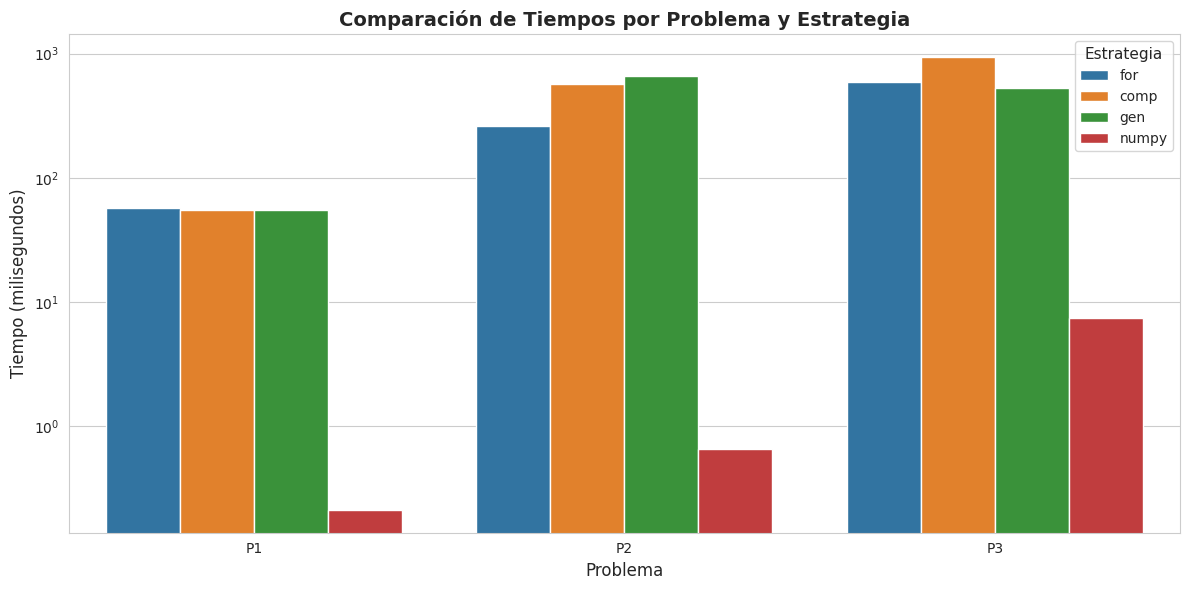


Tiempos en milisegundos:
problema           P1          P2          P3
estrategia                                   
comp        54.557862  566.013708  938.859508
for         57.227762  261.859096  587.461829
gen         55.048205  657.558246  525.414311
numpy        0.211409    0.657141    7.381346


In [35]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=df, x='problema', y='tiempo_ms', hue='estrategia', ax=ax)

ax.set_xlabel('Problema', fontsize=12)
ax.set_ylabel('Tiempo (milisegundos)', fontsize=12)
ax.set_title('Comparación de Tiempos por Problema y Estrategia', fontsize=14, fontweight='bold')
ax.legend(title='Estrategia', title_fontsize=11, fontsize=10)
ax.set_yscale('log')

plt.tight_layout()
plt.show()

print("\nTiempos en milisegundos:")
print(df.pivot(index='estrategia', columns='problema', values='tiempo_ms'))

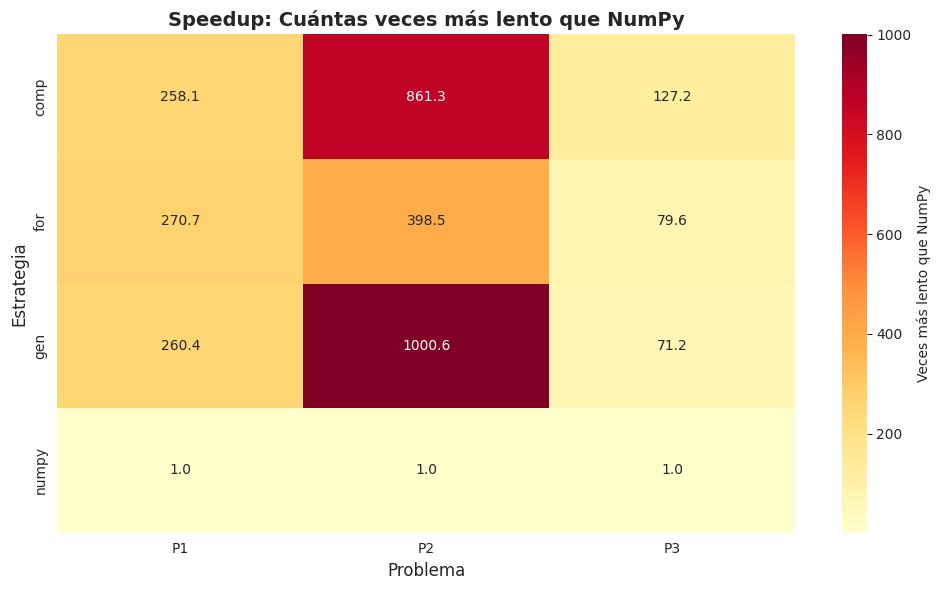


Razones (veces más lento que NumPy):
problema            P1           P2          P3
estrategia                                     
comp        258.068076   861.327380  127.193537
for         270.697159   398.482238   79.587358
gen         260.387482  1000.634637   71.181369
numpy         1.000000     1.000000    1.000000


In [ ]:
df_razones = df.copy()
for problema in ['P1', 'P2', 'P3']:
    tiempo_numpy = df[(df['problema'] == problema) & (df['estrategia'] == 'numpy')]['tiempo_s'].values[0]
    mask = df_razones['problema'] == problema
    df_razones.loc[mask, 'razon_vs_numpy'] = df_razones.loc[mask, 'tiempo_s'] / tiempo_numpy

matriz_razones = df_razones.pivot(index='estrategia', columns='problema', values='razon_vs_numpy')

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matriz_razones, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Veces más lento que NumPy'}, ax=ax)
ax.set_title('Cuántas veces más lento que NumPy', fontsize=14, fontweight='bold')
ax.set_xlabel('Problema', fontsize=12)
ax.set_ylabel('Estrategia', fontsize=12)

plt.tight_layout()
plt.show()

print("\nRazones (veces más lento que NumPy):")
print(matriz_razones)

/tmp/ipykernel_5047/4181572567.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_problema, x='estrategia', y='tiempo_ms', ax=axes[idx],
/tmp/ipykernel_5047/4181572567.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_problema, x='estrategia', y='tiempo_ms', ax=axes[idx],
/tmp/ipykernel_5047/4181572567.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_problema, x='estrategia', y='tiempo_ms', ax=axes[idx],


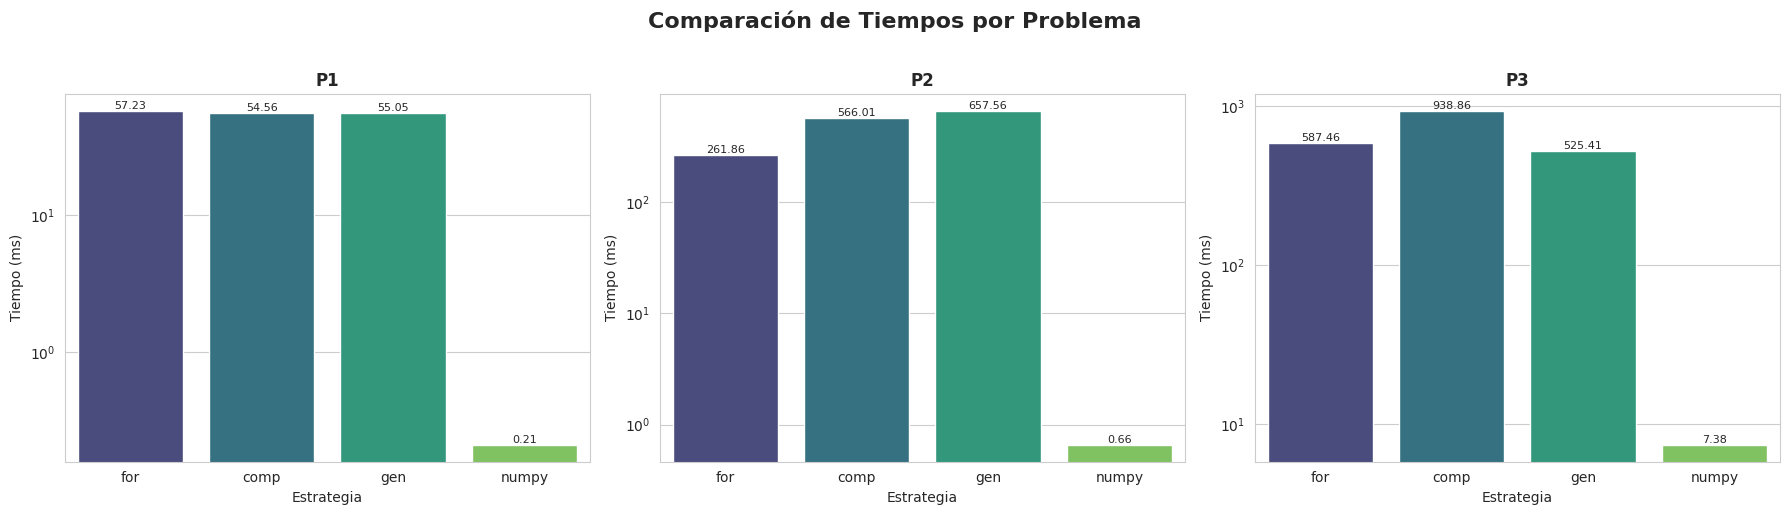

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, problema in enumerate(['P1', 'P2', 'P3']):
    df_problema = df[df['problema'] == problema]
    
    sns.barplot(data=df_problema, x='estrategia', y='tiempo_ms', ax=axes[idx], 
                palette='viridis')
    
    axes[idx].set_title(f'{problema}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Estrategia', fontsize=10)
    axes[idx].set_ylabel('Tiempo (ms)', fontsize=10)
    axes[idx].set_yscale('log')
    
    for i, v in enumerate(df_problema['tiempo_ms']):
        axes[idx].text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.suptitle('Comparación de Tiempos por Problema', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:

print("ANÁLISIS DE RENDIMIENTO")


for problema in ['P1', 'P2', 'P3']:
    print(f"\n{problema}:")
    df_problema = df[df['problema'] == problema]
    
    mas_rapido = df_problema.loc[df_problema['tiempo_s'].idxmin()]
    print(f"   Más rápido: {mas_rapido['estrategia']} ({mas_rapido['tiempo_ms']:.3f} ms)")
    
    tiempo_numpy = df_problema[df_problema['estrategia'] == 'numpy']['tiempo_s'].values[0]
    print(f"   Comparación con NumPy:")
    for estrategia in ['for', 'comp', 'gen']:
        tiempo = df_problema[df_problema['estrategia'] == estrategia]['tiempo_s'].values[0]
        speedup = tiempo / tiempo_numpy
        print(f"     {estrategia:6s}: {speedup:6.1f}x más lento que NumPy")



ANÁLISIS DE RENDIMIENTO

P1:
  ⚡ Más rápido: numpy (0.211 ms)
   Comparación con NumPy:
     for   :  270.7x más lento que NumPy
     comp  :  258.1x más lento que NumPy
     gen   :  260.4x más lento que NumPy

P2:
  ⚡ Más rápido: numpy (0.657 ms)
   Comparación con NumPy:
     for   :  398.5x más lento que NumPy
     comp  :  861.3x más lento que NumPy
     gen   : 1000.6x más lento que NumPy

P3:
  ⚡ Más rápido: numpy (7.381 ms)
   Comparación con NumPy:
     for   :   79.6x más lento que NumPy
     comp  :  127.2x más lento que NumPy
     gen   :   71.2x más lento que NumPy


In [39]:
valores_n = [10_000, 100_000, 1_000_000]
number = 3

resultados_escalamiento = []

print("Midiendo escalamiento con diferentes tamaños de n...")
for n in valores_n:
    print(f"\nTamaño n = {n:,}")
    tiempos_p1 = time_p1(n=n, number=number)
    tiempos_p2 = time_p2(n=n, number=number)
    tiempos_p3 = time_p3(n=n, number=number)
    
    for problema_idx, tiempos in enumerate([tiempos_p1, tiempos_p2, tiempos_p3], 1):
        problema = f'p{problema_idx}'
        for estrategia_idx, estrategia in enumerate(['for', 'comp', 'gen', 'numpy']):
            tiempo_por_llamada = tiempos[estrategia_idx] / number
            resultados_escalamiento.append({
                'problema': problema.upper(),
                'estrategia': estrategia,
                'n': n,
                'tiempo_s': tiempo_por_llamada,
                'tiempo_ms': tiempo_por_llamada * 1000
            })

df_escalamiento = pd.DataFrame(resultados_escalamiento)
print("\nDatos de escalamiento preparados:")
print(df_escalamiento)


Midiendo escalamiento con diferentes tamaños de n...

Tamaño n = 10,000

Tamaño n = 100,000

Tamaño n = 1,000,000

Datos de escalamiento preparados:
   problema estrategia        n  tiempo_s    tiempo_ms
0        P1        for    10000  0.010313    10.312837
1        P1       comp    10000  0.006381     6.380569
2        P1        gen    10000  0.007521     7.521048
3        P1      numpy    10000  0.000046     0.046127
4        P2        for    10000  0.038522    38.522179
5        P2       comp    10000  0.086088    86.087985
6        P2        gen    10000  0.082979    82.979392
7        P2      numpy    10000  0.000163     0.163369
8        P3        for    10000  0.066040    66.039739
9        P3       comp    10000  0.135374   135.374297
10       P3        gen    10000  0.091581    91.581059
11       P3      numpy    10000  0.001134     1.134409
12       P1        for   100000  0.094257    94.257142
13       P1       comp   100000  0.097581    97.581262
14       P1        gen   1

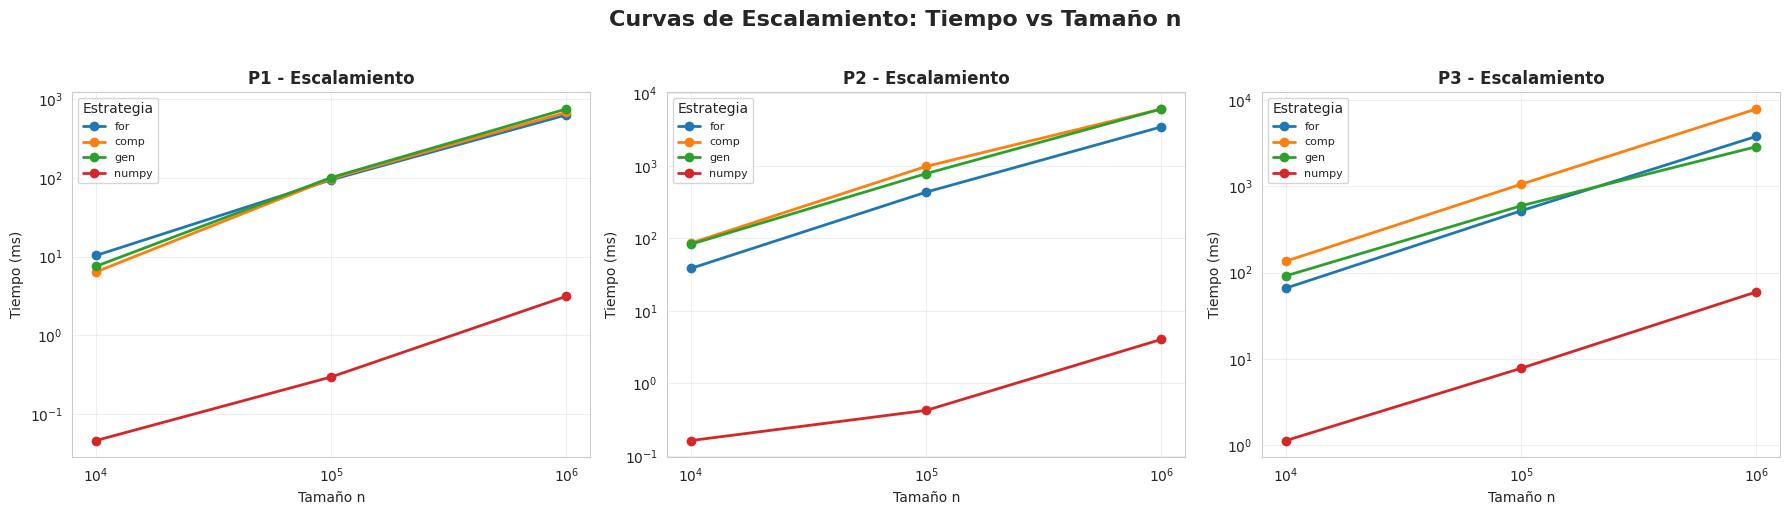

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, problema in enumerate(['P1', 'P2', 'P3']):
    df_problema = df_escalamiento[df_escalamiento['problema'] == problema]
    
    for estrategia in ['for', 'comp', 'gen', 'numpy']:
        df_estrategia = df_problema[df_problema['estrategia'] == estrategia]
        axes[idx].plot(df_estrategia['n'], df_estrategia['tiempo_ms'], 
                      marker='o', label=estrategia, linewidth=2)
    
    axes[idx].set_xlabel('Tamaño n', fontsize=10)
    axes[idx].set_ylabel('Tiempo (ms)', fontsize=10)
    axes[idx].set_title(f'{problema} - Escalamiento', fontsize=12, fontweight='bold')
    axes[idx].set_xscale('log')
    axes[idx].set_yscale('log')
    axes[idx].legend(title='Estrategia', fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Curvas de Escalamiento: Tiempo vs Tamaño n', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [ ]:

print("ANÁLISIS DE ESCALAMIENTO")

for problema in ['P1', 'P2', 'P3']:
    print(f"\n{problema}:")
    df_problema = df_escalamiento[df_escalamiento['problema'] == problema]
    
    for estrategia in ['for', 'comp', 'gen', 'numpy']:
        df_estrategia = df_problema[df_problema['estrategia'] == estrategia].sort_values('n')
        tiempos = df_estrategia['tiempo_ms'].values
        n_valores = df_estrategia['n'].values
        
        if len(tiempos) > 1:
            ratio = tiempos[-1] / tiempos[0]
            n_ratio = n_valores[-1] / n_valores[0]
            escalamiento = ratio / n_ratio
            print(f"  {estrategia:6s}: Tiempo aumenta {ratio:.2f}x cuando n aumenta {n_ratio:.0f}x (escalamiento: {escalamiento:.2f}x)")


ANÁLISIS DE ESCALAMIENTO

P1:
  for   : Tiempo aumenta 60.98x cuando n aumenta 100x (escalamiento: 0.61x)
  comp  : Tiempo aumenta 106.12x cuando n aumenta 100x (escalamiento: 1.06x)
  gen   : Tiempo aumenta 99.49x cuando n aumenta 100x (escalamiento: 0.99x)
  numpy : Tiempo aumenta 67.93x cuando n aumenta 100x (escalamiento: 0.68x)

P2:
  for   : Tiempo aumenta 89.19x cuando n aumenta 100x (escalamiento: 0.89x)
  comp  : Tiempo aumenta 70.32x cuando n aumenta 100x (escalamiento: 0.70x)
  gen   : Tiempo aumenta 73.14x cuando n aumenta 100x (escalamiento: 0.73x)
  numpy : Tiempo aumenta 24.83x cuando n aumenta 100x (escalamiento: 0.25x)

P3:
  for   : Tiempo aumenta 57.21x cuando n aumenta 100x (escalamiento: 0.57x)
  comp  : Tiempo aumenta 57.93x cuando n aumenta 100x (escalamiento: 0.58x)
  gen   : Tiempo aumenta 31.32x cuando n aumenta 100x (escalamiento: 0.31x)
  numpy : Tiempo aumenta 52.66x cuando n aumenta 100x (escalamiento: 0.53x)


## Guía de medición y reporte

- Usa `timeit.timeit` con el mismo `number` de repeticiones para todas las versiones.
- Antes de medir, ejecuta cada función una vez (warm‑up) si tu entorno lo requiere.
- Reporta tiempos en una tabla simple o tupla por problema: `(for, comp, gen, numpy)`.
- Interpreta resultados: ¿qué versión gana?, ¿por cuánto?, ¿cambia con `n`?
- Evita medir al mismo tiempo código que imprime o muestra gráficos.

Sugerencia: prueba varios tamaños `n` (por ejemplo: 10^4, 10^5, 10^6) y observa tendencias.


Aquí tienes una versión mejorada —más clara, profesional y fluida— de tu descripción, manteniendo todo el contenido técnico pero con mejor redacción, estructura y tono didáctico:

---

## Guía de visualización con Seaborn y Matplotlib 

**Objetivo:**
Utilizar los tiempos almacenados en formato JSON para **visualizar y analizar el rendimiento de distintas estrategias**, aprendiendo por tu cuenta a usar **Seaborn** y **Matplotlib**.
Esta guía explica **qué graficar**, **cómo interpretar los resultados** y **qué investigar** en la documentación oficial. *(No se proporciona código.)*

---

### 1️⃣ Preparación conceptual de los datos (formato “largo” o *tidy data*)

Antes de graficar, imagina tu tabla en formato largo, ideal para Seaborn.
Cada fila debe representar una observación o una agregación (por ejemplo, la mediana por problema, estrategia y tamaño `n`).

**Columnas sugeridas:**
`problema` (p1/p2/p3), `estrategia` (for/comp/gen/numpy), `n`, `repeticion`,
`s_por_llamada` (o `ns_por_elemento`), `mediana`, `p25`, `p75`, `host`, `python_version`, `numpy_version`.

**Investiga:** cómo transformar datos a formato largo en Seaborn, y cómo asignar columnas a ejes, color (`hue`), y paneles (`facet`).

---

### 2️⃣ Gráfico de barras agrupadas (comparación por problema)

**Qué mostrar:**
Barras agrupadas por `estrategia` dentro de cada `problema`, donde la altura sea la mediana de `s_por_llamada`.
Añade **barras de error** (p25–p75 o intervalos de confianza) para reflejar la variabilidad.

**Interpretación esperada:**
Identifica la estrategia más rápida en cada problema y comenta las diferencias relativas
(p. ej. *“NumPy es aproximadamente 60× más rápido que el bucle for en P1”*).

**Variaciones:**
Si tienes varios tamaños `n`, crea paneles por `n` o por `problema`.

---

### 3️⃣ Boxplots o Violinplots (variabilidad y outliers)

**Qué mostrar:**
Para un `problema` y `n` fijos, representa la distribución de `s_por_llamada` por `estrategia` mediante boxplots o violinplots.

**Interpretación:**
Compara la dispersión entre estrategias, detecta outliers y analiza cuál es más estable o consistente.
**Sugerencia:** agrega los puntos individuales de las repeticiones (usa *swarmplot* o *stripplot* superpuestos).

---

### 4️⃣ Curvas de escalamiento (tiempo vs tamaño `n`)

**Qué mostrar:**
Gráfico de líneas con `x = n`, `y = s_por_llamada` (o `ns_por_elemento`), y una línea por `estrategia`.
Usa escala log–log si hay grandes diferencias de magnitud.

**Interpretación:**
Compara las pendientes para ver cómo crece el tiempo con `n`.
Detecta cruces donde una estrategia empieza a superar a otra según el tamaño.

**Sugerencia:**
Usa *facets* por `problema` para comparar patrones entre P1, P2 y P3.

---

### 5️⃣ Eficiencia por elemento (`ns_por_elemento`)

**Qué mostrar:**
Gráfico de dispersión o líneas de `ns_por_elemento` frente a `n`, diferenciando por `estrategia`.

**Interpretación:**
Busca trayectorias planas (eficiencia estable).
Comenta desviaciones que puedan indicar efectos de caché, memoria o *overhead*.

---

### 6️⃣ Heatmap de razones (comparación con NumPy)

**Qué mostrar:**
Matriz donde cada celda es la razón `tiempo_estrategia / tiempo_numpy`, organizada por `problema` y `n`.

**Interpretación:**
Colorea las celdas: >1 significa más lento que NumPy; <1, más rápido.
Permite ver de un vistazo cuánto más lenta es cada alternativa y si esa relación cambia con `n`.

---

### 7️⃣ ECDF o histogramas (robustez de medición)

**Qué mostrar:**
Para un `problema` y `n` determinados, traza la **ECDF** o un **histograma** de `s_por_llamada` por `estrategia`.

**Interpretación:**
Compara la probabilidad de obtener tiempos inferiores a un umbral.
Analiza el solapamiento entre estrategias y comenta su robustez.

---

### 8️⃣ Diseño y buenas prácticas de visualización

* **Ejes y unidades:** etiqueta claramente (segundos por llamada, nanosegundos por elemento). Usa escalas logarítmicas si hay diferencias grandes.
* **Títulos y leyendas:** incluye el `problema`, `n`, entorno y fecha si es relevante. Mantén leyendas claras.
* **Paletas:** usa siempre los mismos colores por `estrategia` (orden: for → comp → gen → numpy).
* **Barras de error:** representa p25–p75 o intervalos por *bootstrap*.
* **Anotaciones:** agrega etiquetas informativas (p. ej. “×60 más rápido”).
* **Exportación:** guarda en PNG o SVG con resolución suficiente (DPI alto).

---

### 9️⃣ Interpretación (qué incluir en el reporte)

Para cada figura, redacta **4–6 frases** que respondan:

* ¿Qué estrategia es más rápida y por cuánto? ¿Cambia con `n`?
* ¿Cuál muestra menor dispersión? ¿Existen *outliers*?
* ¿Qué patrones de escalamiento aparecen? ¿Se observan efectos de memoria o caché?
* ¿Qué recomendación práctica harías según el problema?

---

### 🔟 Pistas de investigación (sin código)

Explora en la documentación de Seaborn/Matplotlib cómo:

* Crear gráficos de barras con barras de error.
* Generar boxplots o violinplots con puntos superpuestos.
* Dibujar líneas múltiples (una por `estrategia`) y facetas por `problema`.
* Aplicar escalas logarítmicas y personalizar ejes, leyendas y estilos.
* Construir heatmaps con normalización de colores para ratios.

---

### ✅ Entregables mínimos

1. **Gráfico de barras agrupadas** por `problema` (con barras de error) y su interpretación.
2. **Boxplot o violinplot** por `problema` y `n` (uno representativo) con interpretación.
3. **Curva de escalamiento** (`y` vs `n`) con facetas por `problema` e interpretación.
4. **Heatmap de razones** respecto a NumPy e interpretación.

---

**Recordatorio:**
El objetivo no es reproducir un estilo exacto, sino **demostrar criterio al elegir la visualización adecuada**, **etiquetar correctamente** e **interpretar con rigor** los resultados.

---

¿Quieres que te prepare también una versión más resumida y visual (por ejemplo, como guía para estudiantes o plantilla de trabajo)? Podría incluir íconos, ejemplos de figuras y estructura de reporte.
